In [1]:
import pandas as pd
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, LineString

In [2]:
mr = pd.read_csv('newMR.csv',sep=';')
mr

,id,cpath,mgeom
0,0,"81227,81228,81229,81230,81231,81232,12987","LINESTRING(116.319263822 39.9996783963,116.318..."
1,1,"81232,12987","LINESTRING(116.3177242 39.9994668,116.3167484 ..."
2,2,81235,"LINESTRING(116.315220398 39.9987281104,116.315..."
3,3,"61045,61042,61050,61051,61052,61053,61054,7708...","LINESTRING(116.3158359 39.9974202,116.3158359 ..."
4,4,"40486,3144,40488,40489,40490,12842,12843,12844...","LINESTRING(116.3156977 39.9910941,116.3156977 ..."
...,...,...,...
397239,397239,"73061,73059,58722,68301","LINESTRING(116.3356804 39.8006047,116.3356804 ..."
397240,397240,"68302,68303,68304","LINESTRING(116.3328178 39.8007857,116.331876 3..."
397241,397241,"46411,46394","LINESTRING(116.3274908 39.800067,116.3274908 3..."
397242,397242,"46411,46394","LINESTRING(116.3274908 39.800067,116.3274908 3..."


In [3]:
traj_pair = pd.read_csv('traj_pair_infor.csv')
traj_pair

,Unnamed: 0,traj_id,geom,coordinate1,coordinate2,cost_time,dis_diff,holidays,time_period
0,0,0,"LINESTRING (116.318726 40.009014, 116.315102 4...","(116.318726, 40.009014)","(116.315102, 40.004784)",1.750000,562.623059,0,17
1,1,0,"LINESTRING (116.315102 40.004784, 116.315018 4...","(116.315102, 40.004784)","(116.315018, 40.002842)",0.900000,216.072372,0,17
2,2,0,"LINESTRING (116.315018 40.002842, 116.315041 3...","(116.315018, 40.002842)","(116.315041, 39.998585)",1.783333,473.452423,0,17
3,3,0,"LINESTRING (116.315041 39.998585, 116.315605 3...","(116.315041, 39.998585)","(116.315605, 39.992554)",1.816667,672.385605,0,17
4,4,0,"LINESTRING (116.315605 39.992554, 116.315735 3...","(116.315605, 39.992554)","(116.315735, 39.987846)",0.900000,523.655150,0,17
...,...,...,...,...,...,...,...,...,...
397239,397239,21998,"LINESTRING (116.335815 39.79068, 116.333366 39...","(116.335815, 39.79068)","(116.333366, 39.79073)",0.600000,209.337371,0,23
397240,397240,21998,"LINESTRING (116.333366 39.79073, 116.330444 39...","(116.333366, 39.79073)","(116.330444, 39.79084)",0.400000,249.972523,0,23
397241,397241,21998,"LINESTRING (116.330444 39.79084, 116.328453 39...","(116.330444, 39.79084)","(116.328453, 39.793888)",1.600000,459.854339,0,23
397242,397242,21998,"LINESTRING (116.328453 39.793888, 116.328072 3...","(116.328453, 39.793888)","(116.328072, 39.796574)",0.400000,300.456659,0,23


In [4]:
df = pd.merge(left=traj_pair, right=mr[['id','cpath']], left_on='Unnamed: 0',right_on='id', how='left')
mr = df.drop(columns=['Unnamed: 0','id'],axis=1)
mr

,traj_id,geom,coordinate1,coordinate2,cost_time,dis_diff,holidays,time_period,cpath
0,0,"LINESTRING (116.318726 40.009014, 116.315102 4...","(116.318726, 40.009014)","(116.315102, 40.004784)",1.750000,562.623059,0,17,"81227,81228,81229,81230,81231,81232,12987"
1,0,"LINESTRING (116.315102 40.004784, 116.315018 4...","(116.315102, 40.004784)","(116.315018, 40.002842)",0.900000,216.072372,0,17,"81232,12987"
2,0,"LINESTRING (116.315018 40.002842, 116.315041 3...","(116.315018, 40.002842)","(116.315041, 39.998585)",1.783333,473.452423,0,17,81235
3,0,"LINESTRING (116.315041 39.998585, 116.315605 3...","(116.315041, 39.998585)","(116.315605, 39.992554)",1.816667,672.385605,0,17,"61045,61042,61050,61051,61052,61053,61054,7708..."
4,0,"LINESTRING (116.315605 39.992554, 116.315735 3...","(116.315605, 39.992554)","(116.315735, 39.987846)",0.900000,523.655150,0,17,"40486,3144,40488,40489,40490,12842,12843,12844..."
...,...,...,...,...,...,...,...,...,...
397239,21998,"LINESTRING (116.335815 39.79068, 116.333366 39...","(116.335815, 39.79068)","(116.333366, 39.79073)",0.600000,209.337371,0,23,"73061,73059,58722,68301"
397240,21998,"LINESTRING (116.333366 39.79073, 116.330444 39...","(116.333366, 39.79073)","(116.330444, 39.79084)",0.400000,249.972523,0,23,"68302,68303,68304"
397241,21998,"LINESTRING (116.330444 39.79084, 116.328453 39...","(116.330444, 39.79084)","(116.328453, 39.793888)",1.600000,459.854339,0,23,"46411,46394"
397242,21998,"LINESTRING (116.328453 39.793888, 116.328072 3...","(116.328453, 39.793888)","(116.328072, 39.796574)",0.400000,300.456659,0,23,"46411,46394"


In [5]:
mr_valid = mr[~mr['cpath'].isnull()]
mr_valid

,traj_id,geom,coordinate1,coordinate2,cost_time,dis_diff,holidays,time_period,cpath
0,0,"LINESTRING (116.318726 40.009014, 116.315102 4...","(116.318726, 40.009014)","(116.315102, 40.004784)",1.750000,562.623059,0,17,"81227,81228,81229,81230,81231,81232,12987"
1,0,"LINESTRING (116.315102 40.004784, 116.315018 4...","(116.315102, 40.004784)","(116.315018, 40.002842)",0.900000,216.072372,0,17,"81232,12987"
2,0,"LINESTRING (116.315018 40.002842, 116.315041 3...","(116.315018, 40.002842)","(116.315041, 39.998585)",1.783333,473.452423,0,17,81235
3,0,"LINESTRING (116.315041 39.998585, 116.315605 3...","(116.315041, 39.998585)","(116.315605, 39.992554)",1.816667,672.385605,0,17,"61045,61042,61050,61051,61052,61053,61054,7708..."
4,0,"LINESTRING (116.315605 39.992554, 116.315735 3...","(116.315605, 39.992554)","(116.315735, 39.987846)",0.900000,523.655150,0,17,"40486,3144,40488,40489,40490,12842,12843,12844..."
...,...,...,...,...,...,...,...,...,...
397239,21998,"LINESTRING (116.335815 39.79068, 116.333366 39...","(116.335815, 39.79068)","(116.333366, 39.79073)",0.600000,209.337371,0,23,"73061,73059,58722,68301"
397240,21998,"LINESTRING (116.333366 39.79073, 116.330444 39...","(116.333366, 39.79073)","(116.330444, 39.79084)",0.400000,249.972523,0,23,"68302,68303,68304"
397241,21998,"LINESTRING (116.330444 39.79084, 116.328453 39...","(116.330444, 39.79084)","(116.328453, 39.793888)",1.600000,459.854339,0,23,"46411,46394"
397242,21998,"LINESTRING (116.328453 39.793888, 116.328072 3...","(116.328453, 39.793888)","(116.328072, 39.796574)",0.400000,300.456659,0,23,"46411,46394"


In [6]:
# mr_valid['cpath'] = mr_valid['cpath'].to_list()
def func(row):
    if type(eval(row['cpath'])) == int:
        return 1
    else:
        # print(list(eval(row['cpath'])))
        return len(list(eval(row['cpath'])))
mr_valid['len'] = mr_valid.apply(func, axis=1)
mr_valid

C:\Users\Kafka\AppData\Local\Temp\ipykernel_29668\3994268022.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mr_valid['len'] = mr_valid.apply(func, axis=1)


,traj_id,geom,coordinate1,coordinate2,cost_time,dis_diff,holidays,time_period,cpath,len
0,0,"LINESTRING (116.318726 40.009014, 116.315102 4...","(116.318726, 40.009014)","(116.315102, 40.004784)",1.750000,562.623059,0,17,"81227,81228,81229,81230,81231,81232,12987",7
1,0,"LINESTRING (116.315102 40.004784, 116.315018 4...","(116.315102, 40.004784)","(116.315018, 40.002842)",0.900000,216.072372,0,17,"81232,12987",2
2,0,"LINESTRING (116.315018 40.002842, 116.315041 3...","(116.315018, 40.002842)","(116.315041, 39.998585)",1.783333,473.452423,0,17,81235,1
3,0,"LINESTRING (116.315041 39.998585, 116.315605 3...","(116.315041, 39.998585)","(116.315605, 39.992554)",1.816667,672.385605,0,17,"61045,61042,61050,61051,61052,61053,61054,7708...",9
4,0,"LINESTRING (116.315605 39.992554, 116.315735 3...","(116.315605, 39.992554)","(116.315735, 39.987846)",0.900000,523.655150,0,17,"40486,3144,40488,40489,40490,12842,12843,12844...",17
...,...,...,...,...,...,...,...,...,...,...
397239,21998,"LINESTRING (116.335815 39.79068, 116.333366 39...","(116.335815, 39.79068)","(116.333366, 39.79073)",0.600000,209.337371,0,23,"73061,73059,58722,68301",4
397240,21998,"LINESTRING (116.333366 39.79073, 116.330444 39...","(116.333366, 39.79073)","(116.330444, 39.79084)",0.400000,249.972523,0,23,"68302,68303,68304",3
397241,21998,"LINESTRING (116.330444 39.79084, 116.328453 39...","(116.330444, 39.79084)","(116.328453, 39.793888)",1.600000,459.854339,0,23,"46411,46394",2
397242,21998,"LINESTRING (116.328453 39.793888, 116.328072 3...","(116.328453, 39.793888)","(116.328072, 39.796574)",0.400000,300.456659,0,23,"46411,46394",2


<Axes: xlabel='len'>

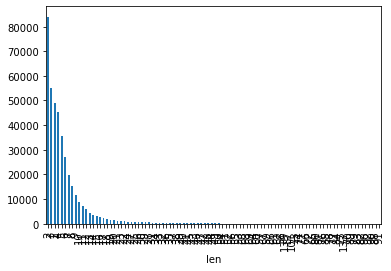

In [7]:
mr_valid['len'].value_counts().plot(kind='bar')

In [8]:
mr_valid['len'].value_counts().sort_values(ascending=False).head(10)

len
2     84059
3     55053
1     48883
4     45357
5     35531
6     26918
7     19788
8     15198
9     11640
10     8853
Name: count, dtype: int64

In [10]:
mr_valid = mr_valid[mr_valid['len'] <= 5]
mr_valid

,traj_id,geom,coordinate1,coordinate2,cost_time,dis_diff,holidays,time_period,cpath,len
1,0,"LINESTRING (116.315102 40.004784, 116.315018 4...","(116.315102, 40.004784)","(116.315018, 40.002842)",0.900000,216.072372,0,17,"81232,12987",2
2,0,"LINESTRING (116.315018 40.002842, 116.315041 3...","(116.315018, 40.002842)","(116.315041, 39.998585)",1.783333,473.452423,0,17,81235,1
12,0,"LINESTRING (116.307411 39.959034, 116.310738 3...","(116.307411, 39.959034)","(116.310738, 39.957153)",1.833333,362.315832,0,18,"67757,67743,64590",3
13,0,"LINESTRING (116.310738 39.957153, 116.316505 3...","(116.310738, 39.957153)","(116.316505, 39.956985)",1.016667,491.928438,0,18,"64588,64589,64605,64582",4
14,0,"LINESTRING (116.316505 39.956985, 116.320061 3...","(116.316505, 39.956985)","(116.320061, 39.956863)",2.883333,303.774007,0,18,"28555,11132,43542,43545",4
...,...,...,...,...,...,...,...,...,...,...
397239,21998,"LINESTRING (116.335815 39.79068, 116.333366 39...","(116.335815, 39.79068)","(116.333366, 39.79073)",0.600000,209.337371,0,23,"73061,73059,58722,68301",4
397240,21998,"LINESTRING (116.333366 39.79073, 116.330444 39...","(116.333366, 39.79073)","(116.330444, 39.79084)",0.400000,249.972523,0,23,"68302,68303,68304",3
397241,21998,"LINESTRING (116.330444 39.79084, 116.328453 39...","(116.330444, 39.79084)","(116.328453, 39.793888)",1.600000,459.854339,0,23,"46411,46394",2
397242,21998,"LINESTRING (116.328453 39.793888, 116.328072 3...","(116.328453, 39.793888)","(116.328072, 39.796574)",0.400000,300.456659,0,23,"46411,46394",2


In [11]:
def func(row):
    return row['cpath'].split(',')
mr_valid['cpath'] = mr_valid.apply(func, axis=1)
mr_valid

,traj_id,geom,coordinate1,coordinate2,cost_time,dis_diff,holidays,time_period,cpath,len
1,0,"LINESTRING (116.315102 40.004784, 116.315018 4...","(116.315102, 40.004784)","(116.315018, 40.002842)",0.900000,216.072372,0,17,"[81232, 12987]",2
2,0,"LINESTRING (116.315018 40.002842, 116.315041 3...","(116.315018, 40.002842)","(116.315041, 39.998585)",1.783333,473.452423,0,17,[81235],1
12,0,"LINESTRING (116.307411 39.959034, 116.310738 3...","(116.307411, 39.959034)","(116.310738, 39.957153)",1.833333,362.315832,0,18,"[67757, 67743, 64590]",3
13,0,"LINESTRING (116.310738 39.957153, 116.316505 3...","(116.310738, 39.957153)","(116.316505, 39.956985)",1.016667,491.928438,0,18,"[64588, 64589, 64605, 64582]",4
14,0,"LINESTRING (116.316505 39.956985, 116.320061 3...","(116.316505, 39.956985)","(116.320061, 39.956863)",2.883333,303.774007,0,18,"[28555, 11132, 43542, 43545]",4
...,...,...,...,...,...,...,...,...,...,...
397239,21998,"LINESTRING (116.335815 39.79068, 116.333366 39...","(116.335815, 39.79068)","(116.333366, 39.79073)",0.600000,209.337371,0,23,"[73061, 73059, 58722, 68301]",4
397240,21998,"LINESTRING (116.333366 39.79073, 116.330444 39...","(116.333366, 39.79073)","(116.330444, 39.79084)",0.400000,249.972523,0,23,"[68302, 68303, 68304]",3
397241,21998,"LINESTRING (116.330444 39.79084, 116.328453 39...","(116.330444, 39.79084)","(116.328453, 39.793888)",1.600000,459.854339,0,23,"[46411, 46394]",2
397242,21998,"LINESTRING (116.328453 39.793888, 116.328072 3...","(116.328453, 39.793888)","(116.328072, 39.796574)",0.400000,300.456659,0,23,"[46411, 46394]",2


In [13]:
mr_valid = mr_valid.explode('cpath')
mr_valid

,traj_id,geom,coordinate1,coordinate2,cost_time,dis_diff,holidays,time_period,cpath,len
1,0,"LINESTRING (116.315102 40.004784, 116.315018 4...","(116.315102, 40.004784)","(116.315018, 40.002842)",0.900000,216.072372,0,17,81232,2
1,0,"LINESTRING (116.315102 40.004784, 116.315018 4...","(116.315102, 40.004784)","(116.315018, 40.002842)",0.900000,216.072372,0,17,12987,2
2,0,"LINESTRING (116.315018 40.002842, 116.315041 3...","(116.315018, 40.002842)","(116.315041, 39.998585)",1.783333,473.452423,0,17,81235,1
12,0,"LINESTRING (116.307411 39.959034, 116.310738 3...","(116.307411, 39.959034)","(116.310738, 39.957153)",1.833333,362.315832,0,18,67757,3
12,0,"LINESTRING (116.307411 39.959034, 116.310738 3...","(116.307411, 39.959034)","(116.310738, 39.957153)",1.833333,362.315832,0,18,67743,3
...,...,...,...,...,...,...,...,...,...,...
397241,21998,"LINESTRING (116.330444 39.79084, 116.328453 39...","(116.330444, 39.79084)","(116.328453, 39.793888)",1.600000,459.854339,0,23,46394,2
397242,21998,"LINESTRING (116.328453 39.793888, 116.328072 3...","(116.328453, 39.793888)","(116.328072, 39.796574)",0.400000,300.456659,0,23,46411,2
397242,21998,"LINESTRING (116.328453 39.793888, 116.328072 3...","(116.328453, 39.793888)","(116.328072, 39.796574)",0.400000,300.456659,0,23,46394,2
397243,21998,"LINESTRING (116.328072 39.796574, 116.327988 3...","(116.328072, 39.796574)","(116.327988, 39.797451)",0.200000,97.787681,0,23,46411,2


In [14]:
road = pd.read_csv('../stmatch/road.csv')
road

,id,old_id,WKT,source,target,cost,x1,y1,x2,y2
0,0,0,"LINESTRING (116.3894407 39.9062721, 116.389446...",0,5742,28.939117,116.389441,39.906272,116.389446,39.906011
1,1,1,"LINESTRING (116.3894407 39.9062721, 116.386428...",0,1,257.873361,116.389441,39.906272,116.386428,39.906169
2,2,1,"LINESTRING (116.386428 39.9061687, 116.3856338...",1,38994,67.976743,116.386428,39.906169,116.385634,39.906142
3,3,2,"LINESTRING (116.3930703 39.906394, 116.3894407...",2,0,310.663605,116.393070,39.906394,116.389441,39.906272
4,4,3,"LINESTRING (116.3970962 39.9065222, 116.393070...",3,2,344.549935,116.397096,39.906522,116.393070,39.906394
...,...,...,...,...,...,...,...,...,...,...
85390,85390,38025,"LINESTRING (116.4062083 39.8313723, 116.406357...",49687,49686,26.350831,116.406208,39.831372,116.406357,39.831164
85391,85391,38026,"LINESTRING (116.3121472 39.9935096, 116.312172...",49693,42179,39.355411,116.312147,39.993510,116.312173,39.993156
85392,85392,38026,"LINESTRING (116.3121727 39.9931557, 116.312119...",42179,42178,8.128968,116.312173,39.993156,116.312119,39.993095
85393,85393,38026,"LINESTRING (116.3121191 39.9930952, 116.312155...",42178,42177,49.551302,116.312119,39.993095,116.312155,39.992650


In [16]:
mr_valid['cpath'] = mr_valid['cpath'].astype(int)

In [17]:
res = pd.merge(left=mr_valid, right=road, left_on='cpath', right_on='id', how='left')
res

,traj_id,geom,coordinate1,coordinate2,cost_time,dis_diff,holidays,time_period,cpath,len,id,old_id,WKT,source,target,cost,x1,y1,x2,y2
0,0,"LINESTRING (116.315102 40.004784, 116.315018 4...","(116.315102, 40.004784)","(116.315018, 40.002842)",0.900000,216.072372,0,17,81232,2,81232,36306,"LINESTRING (116.3177242 39.9994668, 116.316748...",9737,9736,100.406686,116.317724,39.999467,116.316748,39.998962
1,0,"LINESTRING (116.315102 40.004784, 116.315018 4...","(116.315102, 40.004784)","(116.315018, 40.002842)",0.900000,216.072372,0,17,12987,2,12987,4900,"LINESTRING (116.3167484 39.9989623, 116.317724...",9736,9737,100.406686,116.316748,39.998962,116.317724,39.999467
2,0,"LINESTRING (116.315018 40.002842, 116.315041 3...","(116.315018, 40.002842)","(116.315041, 39.998585)",1.783333,473.452423,0,17,81235,1,81235,36306,"LINESTRING (116.3157202 39.9987527, 116.312787...",9734,9733,250.976954,116.315720,39.998753,116.312787,39.998608
3,0,"LINESTRING (116.307411 39.959034, 116.310738 3...","(116.307411, 39.959034)","(116.310738, 39.957153)",1.833333,362.315832,0,18,67757,3,67757,30067,"LINESTRING (116.3076567 39.9572086, 116.307654...",41764,41763,59.536597,116.307657,39.957209,116.307655,39.956672
4,0,"LINESTRING (116.307411 39.959034, 116.310738 3...","(116.307411, 39.959034)","(116.310738, 39.957153)",1.833333,362.315832,0,18,67743,3,67743,30063,"LINESTRING (116.3076546 39.9566724, 116.310289...",41763,40242,225.228398,116.307655,39.956672,116.310290,39.956718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741238,21998,"LINESTRING (116.330444 39.79084, 116.328453 39...","(116.330444, 39.79084)","(116.328453, 39.793888)",1.600000,459.854339,0,23,46394,2,46394,20701,"LINESTRING (116.3274908 39.800067, 116.3276872...",29638,29639,19.357983,116.327491,39.800067,116.327687,39.800153
741239,21998,"LINESTRING (116.328453 39.793888, 116.328072 3...","(116.328453, 39.793888)","(116.328072, 39.796574)",0.400000,300.456659,0,23,46411,2,46411,20704,"LINESTRING (116.3276272 39.8002128, 116.327490...",29653,29638,19.962984,116.327627,39.800213,116.327491,39.800067
741240,21998,"LINESTRING (116.328453 39.793888, 116.328072 3...","(116.328453, 39.793888)","(116.328072, 39.796574)",0.400000,300.456659,0,23,46394,2,46394,20701,"LINESTRING (116.3274908 39.800067, 116.3276872...",29638,29639,19.357983,116.327491,39.800067,116.327687,39.800153
741241,21998,"LINESTRING (116.328072 39.796574, 116.327988 3...","(116.328072, 39.796574)","(116.327988, 39.797451)",0.200000,97.787681,0,23,46411,2,46411,20704,"LINESTRING (116.3276272 39.8002128, 116.327490...",29653,29638,19.962984,116.327627,39.800213,116.327491,39.800067


In [18]:
res['speed'] = res['dis_diff'] / res['cost_time']
res['road_cost_time'] = res['cost'] / res['speed']
res

,traj_id,geom,coordinate1,coordinate2,cost_time,dis_diff,holidays,time_period,cpath,len,...,WKT,source,target,cost,x1,y1,x2,y2,speed,road_cost_time
0,0,"LINESTRING (116.315102 40.004784, 116.315018 4...","(116.315102, 40.004784)","(116.315018, 40.002842)",0.900000,216.072372,0,17,81232,2,...,"LINESTRING (116.3177242 39.9994668, 116.316748...",9737,9736,100.406686,116.317724,39.999467,116.316748,39.998962,240.080413,0.418221
1,0,"LINESTRING (116.315102 40.004784, 116.315018 4...","(116.315102, 40.004784)","(116.315018, 40.002842)",0.900000,216.072372,0,17,12987,2,...,"LINESTRING (116.3167484 39.9989623, 116.317724...",9736,9737,100.406686,116.316748,39.998962,116.317724,39.999467,240.080413,0.418221
2,0,"LINESTRING (116.315018 40.002842, 116.315041 3...","(116.315018, 40.002842)","(116.315041, 39.998585)",1.783333,473.452423,0,17,81235,1,...,"LINESTRING (116.3157202 39.9987527, 116.312787...",9734,9733,250.976954,116.315720,39.998753,116.312787,39.998608,265.487340,0.945344
3,0,"LINESTRING (116.307411 39.959034, 116.310738 3...","(116.307411, 39.959034)","(116.310738, 39.957153)",1.833333,362.315832,0,18,67757,3,...,"LINESTRING (116.3076567 39.9572086, 116.307654...",41764,41763,59.536597,116.307657,39.957209,116.307655,39.956672,197.626817,0.301258
4,0,"LINESTRING (116.307411 39.959034, 116.310738 3...","(116.307411, 39.959034)","(116.310738, 39.957153)",1.833333,362.315832,0,18,67743,3,...,"LINESTRING (116.3076546 39.9566724, 116.310289...",41763,40242,225.228398,116.307655,39.956672,116.310290,39.956718,197.626817,1.139665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741238,21998,"LINESTRING (116.330444 39.79084, 116.328453 39...","(116.330444, 39.79084)","(116.328453, 39.793888)",1.600000,459.854339,0,23,46394,2,...,"LINESTRING (116.3274908 39.800067, 116.3276872...",29638,29639,19.357983,116.327491,39.800067,116.327687,39.800153,287.408962,0.067353
741239,21998,"LINESTRING (116.328453 39.793888, 116.328072 3...","(116.328453, 39.793888)","(116.328072, 39.796574)",0.400000,300.456659,0,23,46411,2,...,"LINESTRING (116.3276272 39.8002128, 116.327490...",29653,29638,19.962984,116.327627,39.800213,116.327491,39.800067,751.141649,0.026577
741240,21998,"LINESTRING (116.328453 39.793888, 116.328072 3...","(116.328453, 39.793888)","(116.328072, 39.796574)",0.400000,300.456659,0,23,46394,2,...,"LINESTRING (116.3274908 39.800067, 116.3276872...",29638,29639,19.357983,116.327491,39.800067,116.327687,39.800153,751.141649,0.025771
741241,21998,"LINESTRING (116.328072 39.796574, 116.327988 3...","(116.328072, 39.796574)","(116.327988, 39.797451)",0.200000,97.787681,0,23,46411,2,...,"LINESTRING (116.3276272 39.8002128, 116.327490...",29653,29638,19.962984,116.327627,39.800213,116.327491,39.800067,488.938405,0.040829


In [ ]:
res[res['traj_id']==0]['road_cost_time'].sum()

In [ ]:
res[res['traj_id']==0]['road_cost_time'].sum()

In [ ]:
res[res['traj_id']==0]

In [21]:
res1 = res.drop(columns=['id', 'old_id', 'source', 'target', 'len', 'traj_id','geom','coordinate1','coordinate2','cost_time','dis_diff'],axis=1)
res1

,holidays,time_period,cpath,WKT,cost,x1,y1,x2,y2,speed,road_cost_time
0,0,17,81232,"LINESTRING (116.3177242 39.9994668, 116.316748...",100.406686,116.317724,39.999467,116.316748,39.998962,240.080413,0.418221
1,0,17,12987,"LINESTRING (116.3167484 39.9989623, 116.317724...",100.406686,116.316748,39.998962,116.317724,39.999467,240.080413,0.418221
2,0,17,81235,"LINESTRING (116.3157202 39.9987527, 116.312787...",250.976954,116.315720,39.998753,116.312787,39.998608,265.487340,0.945344
3,0,18,67757,"LINESTRING (116.3076567 39.9572086, 116.307654...",59.536597,116.307657,39.957209,116.307655,39.956672,197.626817,0.301258
4,0,18,67743,"LINESTRING (116.3076546 39.9566724, 116.310289...",225.228398,116.307655,39.956672,116.310290,39.956718,197.626817,1.139665
...,...,...,...,...,...,...,...,...,...,...,...
741238,0,23,46394,"LINESTRING (116.3274908 39.800067, 116.3276872...",19.357983,116.327491,39.800067,116.327687,39.800153,287.408962,0.067353
741239,0,23,46411,"LINESTRING (116.3276272 39.8002128, 116.327490...",19.962984,116.327627,39.800213,116.327491,39.800067,751.141649,0.026577
741240,0,23,46394,"LINESTRING (116.3274908 39.800067, 116.3276872...",19.357983,116.327491,39.800067,116.327687,39.800153,751.141649,0.025771
741241,0,23,46411,"LINESTRING (116.3276272 39.8002128, 116.327490...",19.962984,116.327627,39.800213,116.327491,39.800067,488.938405,0.040829


In [22]:
res1.to_csv('train.csv',index=False)